In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('Winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

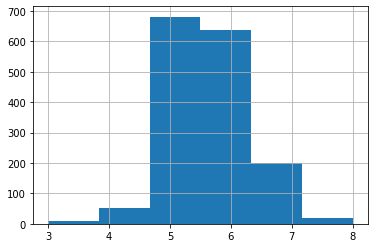

In [5]:
#visualize the distrubtion of quality and we can see the low sampling numbers for group 3,4,8
df['quality'].hist(bins=6)

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

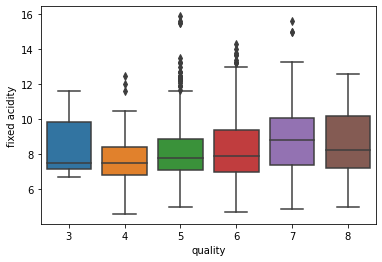

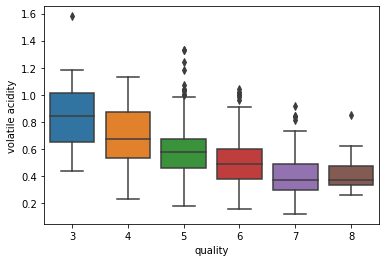

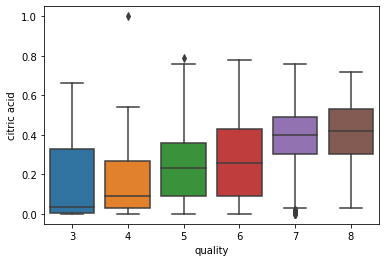

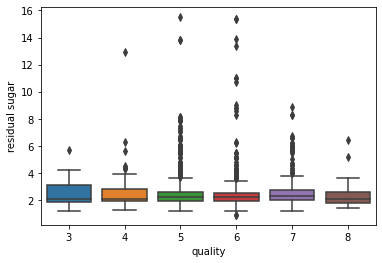

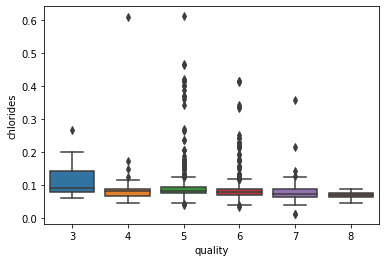

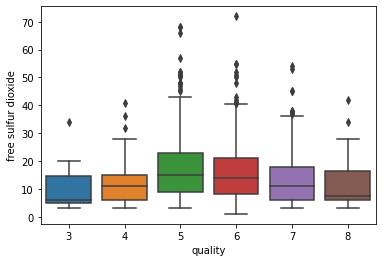

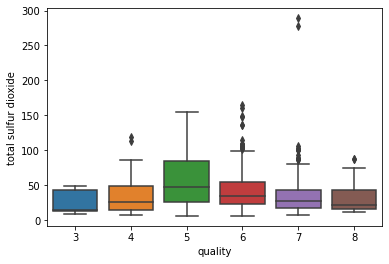

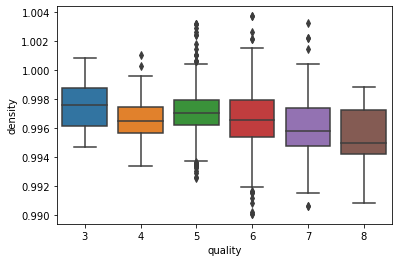

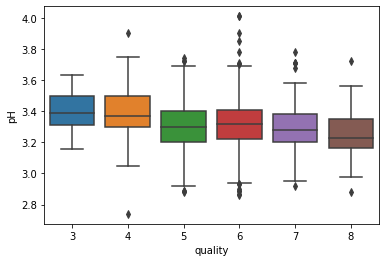

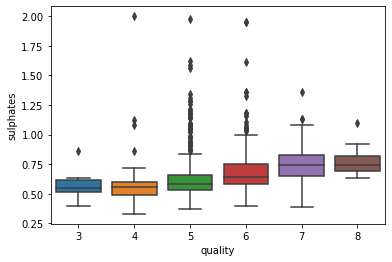

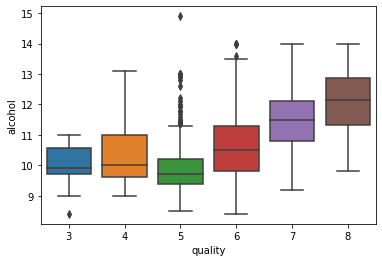

In [13]:
#boxplot to show the outlieres and quality based on different features
for i in df.drop('quality', axis=1):
    sns.boxplot(data=df, x='quality', y=i)
    plt.show()

for those features with outlieres, we have to remove outliers. However, it is not a good idea to remove many outlieres for a feature, as we loose so many data.

## Outliers

In [14]:
def remove_outlier(data,column):
    
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data.loc[(data[column] > fence_low) & (data[column] < fence_high)]
    return data_out

In [16]:
#removing outliers based on box plots for only the features that had few outliers 

features_outliers=df[['fixed acidity','volatile acidity', 'citric acid', 'total sulfur dioxide']]

for col in features_outliers[1:]:
    df_final=remove_outlier(df,col)

In [17]:
df_final['quality'].value_counts()

6    632
5    631
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

few numbers in majority classes were removed

## Bivariate Analysis

In [ ]:
# sns.pairplot(df_final, hue='quality')

Results showed that fixed acidity is corrolated with PH, density and citric acid.



## Data Prepration for Model

In [18]:
features=df_final.drop('quality', axis=1)
labels=df_final[['quality']]

In [19]:
features_n = StandardScaler().fit(features).transform(features)   #array

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features_n, labels, test_size = 0.20, random_state = 42)

## Random Forest-K Fold

In [21]:
RF=RandomForestClassifier(n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(RF, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.6194332 , 0.66396761, 0.65853659, 0.68699187, 0.69918699])

In [22]:
RF.fit(X_train, y_train)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_jobs=-1)

In [23]:
y_test_predict=RF.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.6925566343042071

In [24]:
# classification report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.77      0.75      0.76       136
           6       0.60      0.77      0.68       117
           7       0.81      0.55      0.66        40
           8       0.00      0.00      0.00         2

    accuracy                           0.69       309
   macro avg       0.36      0.34      0.35       309
weighted avg       0.67      0.69      0.68       309



c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It has been shown that the number of categories for the minority groups can not be predicted by the model. For this issue we can re-group samples (group 3,4 in A, Group 5,6 in B,..) or we can oversample minority groups

## Oversampling of Minority Groups

In [26]:
# transform the dataset
oversample = SMOTE()
features_over, labels_over = oversample.fit_resample(features_n, labels)

In [27]:
features_over.shape

(3792, 11)

In [28]:
features_n.shape

(1541, 11)

We can see the fixing for oversampling!

In [30]:
labels_over['quality'].value_counts()

7    632
5    632
3    632
8    632
6    632
4    632
Name: quality, dtype: int64

In [35]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_over, labels_over, test_size = 0.20, random_state = 42)

In [36]:
RF1=RandomForestClassifier(n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(RF1, X_train_1, y_train_1, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.85502471, 0.83525535, 0.86326194, 0.85973597, 0.8630363 ])

In [37]:
RF1.fit(X_train_1, y_train_1)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_jobs=-1)

In [38]:
y_test_predict_1 = RF1.predict(X_test_1)
print(accuracy_score(y_test_1, y_test_predict_1))

0.8511198945981555


In [39]:
# classification report
print(classification_report(y_test_1, y_test_predict_1))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       119
           4       0.91      0.95      0.93       128
           5       0.73      0.73      0.73       135
           6       0.69      0.58      0.63       141
           7       0.84      0.91      0.87       121
           8       0.95      1.00      0.97       115

    accuracy                           0.85       759
   macro avg       0.85      0.86      0.86       759
weighted avg       0.84      0.85      0.85       759



We can see the improvement in model for minority classes

## RF-Hyperparameter Tuning Grid Serach CV

In [40]:
RF = RandomForestClassifier()

In [42]:
paramaters = {'max_depth': [1, 2, 3, 4, None],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None], 
              'criterion': ['gini', 'entropy']}

In [43]:
cv = GridSearchCV(RF,
                  param_grid=paramaters, #our paremeters,
                  cv = 5,
                  n_jobs = -1
                  )

In [44]:
cv.fit(X_train_1, y_train_1)

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, None],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [45]:
print('Best Parameters using for grid search: \n', cv.best_params_)

Best Parameters using for grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}


### Run the model with Best parameters from Gris Search CV

In [47]:
model= RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, max_features='sqrt', n_jobs=-1)
k_fold=StratifiedKFold(n_splits=5)
cross_val_score(model, X_train_1, y_train_1, cv=k_fold, scoring='accuracy', n_jobs=-1)

model.fit(X_train_1, y_train_1)

y_test_predict_1 = model.predict(X_test_1)
print(accuracy_score(y_test_1, y_test_predict_1))

# classification report
print(classification_report(y_test_1, y_test_predict_1))

c:\users\rahel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8656126482213439
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       119
           4       0.93      0.97      0.95       128
           5       0.73      0.76      0.74       135
           6       0.73      0.60      0.66       141
           7       0.86      0.93      0.90       121
           8       0.97      0.99      0.98       115

    accuracy                           0.87       759
   macro avg       0.87      0.88      0.87       759
weighted avg       0.86      0.87      0.86       759

